In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [2]:
churn=pd.read_csv("CustomerChurn.csv")
churn.shape

(7043, 21)

In [3]:
churn.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [4]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
churn.isnull().mean()*100

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

In [6]:
churn[churn.duplicated()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [7]:
churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

The customer churn dataset consists of **7043 observations** (rows) and **21 features** (columns). Preliminary data exploration reveals that 3 columns are labeled as numerical features and 18 are categorized as categorical variables. No missing or duplicate values were detected during the initial quality assessment. 

Upon closer inspection, it came to my attention that column `TotalCharges` contains of numerical values but it classified as categorical feature likely because of formatting issues or any inconsistencies. 

In [8]:
churn.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


`SeniorCitizen` feature, although represented as a numerical column with values 0 and 1, looks more like a categorical column. This is supported by the fact that its 25th,50th, and 75th percentiles are 0, and it only takes on minimum value of 0 and the maximum value of 1.

`Tenure`: The mean is 32 months and the median is 29 months, suggesting a slight right skew in its distribution.

`MonthlyCharges`: The mean is 64 dollars and the median is 70 dollars, indicating potential skewness in the distribution, likely towards lower values.

#### Working with Total Charges Features:

In [9]:
churn_copy=churn.copy()

In [10]:
churn_copy['TotalCharges']=churn_copy['TotalCharges'].replace(' ',np.nan)

In [11]:
churn_copy['TotalCharges']=churn_copy['TotalCharges'].astype(float)

In [12]:
churn_copy.isnull().mean()*100

customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.156183
Churn               0.000000
dtype: float64

In [13]:
churn_copy.dropna(subset=['TotalCharges'],inplace=True)

After replacing the blank values (' ') by np.nan, approximately 0.15% missing values was introduced into the dataset. Since, the missing value is less that 5% and assuming that the values were missing completely  at random (MCAR), these records were removed from the dataset to maintain data quality.

#### Inspecting the target variable:

In [14]:
round(churn_copy['Churn'].value_counts(normalize=True)*100,2)

Churn
No     73.42
Yes    26.58
Name: proportion, dtype: float64

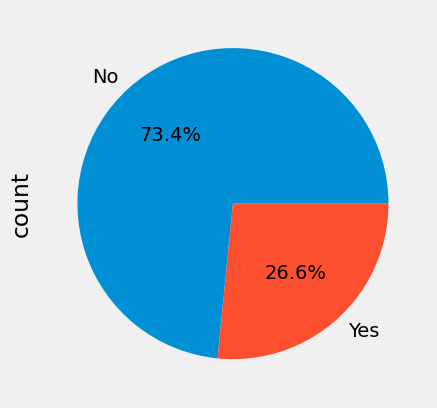

In [15]:
churn_copy['Churn'].value_counts().plot(kind='pie',autopct="%1.1f%%")

plt.show()

The target variable for this analysis is Churn. Examination of the class distribution reveals that the dataset is imbalanced dataset with  approximately 73.4% customers classified as non-churners and 26.6% as churners. The primary objective of this project is to derive actionable insights into the characteristics of customers who are likely to churn and to identify strategies for reducing customer attrition.